In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import math

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [ ]:
src = cv2.imread("image1.jpg", cv2.IMREAD_COLOR)

scale_percent = 10 # percent of original size
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)
dim = (width, height)
  
src = cv2.resize(src, dim, interpolation = cv2.INTER_AREA)
 

plt.imshow(src)
plt.title('image')
plt.show()


#cv2.imshow('image',src)
#cv2.waitKey(0)

In [ ]:
real_points = [
    [65, 43],
    [88, 43],
    [112, 44],
    [136, 44],
    [160, 45],
    [183, 45],
    [207, 46],
    [231, 46],
    
    [65, 67],
    [88, 67],
    [112, 68],
    [135, 68],
    [159, 68],
    [183, 69],
    [207, 69],
    [230, 69],
    
    [65, 91],
    [88, 91],
    [112, 92],
    [135, 92],
    [159, 92],
    [183, 93],
    [206, 93],
    [230, 94],
    
    
    [64, 115],
    [88, 115],
    [111, 115],
    [135, 116],
    [158, 116],
    [182, 117],
    [206, 117],
    [229, 117],
    
    [63, 138],
    [87, 138],
    [111, 139],
    [134, 139],
    [158, 140],
    [182, 140],
    [205, 140],
    [229, 141]
]


plt.imshow(src)
plt.scatter(real_points)
plt.title('image')
plt.show()

In [26]:
def harris(img, k = 0.04):
    src = cv2.GaussianBlur(img, (5, 5), 0)

    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    scale = 0.01
    delta = 0
    ddepth = cv2.CV_16S

    Ix = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    Iy = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    Ix2 = Ix*Ix
    Iy2 = Iy*Iy
    Ixy = Ix*Iy

    Sx2 = cv2.GaussianBlur(Ix2,(3,3), 0)
    Sy2 = cv2.GaussianBlur(Iy2,(3,3), 0)
    Sxy = cv2.GaussianBlur(Ixy,(3,3), 0)

    R = np.zeros((Sx2.shape[0], Sx2.shape[1]))

    for i in range(Sx2.shape[0]):
        for j in range(Sx2.shape[1]):
            M = [[Sx2[i][j], Sxy[i][j]], [Sxy[i][j], Sy2[i][j]]]
            R[i][j] = np.linalg.det(M) - k*np.trace(M)**2

    T = img.copy()
    T[R > 0.01 * R.max()] = [255,0, 0]
    K = R > 0.01 * R.max()
    idx = 0
    
    points = []
    
    for i in range(len(R)):
        for j in range(len(R[i])):
            if(R[i][j] > 0):
                points.append([i,j])
   # boolean = cdist(points, points) > 15
    
   # matrix = [[] for __ in range(len(boolean))]
    
    #for row_i, row in enumerate(boolean):
     #   matrix[row_i] = list([i for i, is_true in enumerate(row) if is_true])
    #
    print(points)

    plt.imshow(T)
    plt.show()

[[43, 66], [43, 88], [44, 66], [44, 67], [44, 87], [44, 88], [44, 89], [44, 112], [44, 113], [44, 134], [44, 136], [44, 161], [44, 183], [45, 65], [45, 67], [45, 87], [45, 88], [45, 112], [45, 113], [45, 114], [45, 134], [45, 135], [45, 136], [45, 137], [45, 160], [45, 161], [45, 182], [45, 183], [45, 184], [45, 208], [45, 230], [45, 231], [46, 113], [46, 114], [46, 134], [46, 135], [46, 136], [46, 159], [46, 160], [46, 161], [46, 182], [46, 183], [46, 184], [46, 208], [46, 209], [46, 229], [46, 230], [46, 232], [47, 161], [47, 162], [47, 181], [47, 182], [47, 183], [47, 207], [47, 208], [47, 209], [47, 229], [47, 230], [47, 231], [47, 232], [48, 209], [48, 229], [48, 230], [65, 66], [65, 67], [66, 64], [66, 66], [66, 67], [66, 87], [66, 88], [66, 89], [66, 90], [66, 111], [66, 114], [66, 138], [67, 64], [67, 66], [67, 67], [67, 87], [67, 88], [67, 89], [67, 90], [67, 111], [67, 112], [67, 113], [67, 134], [67, 135], [67, 136], [67, 137], [67, 157], [67, 158], [67, 159], [67, 160], [67

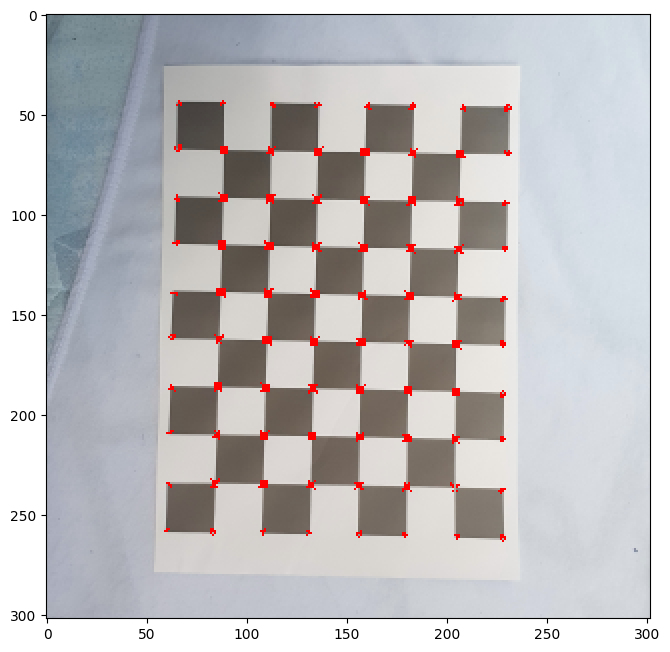

In [27]:
harris(src, 0.04)

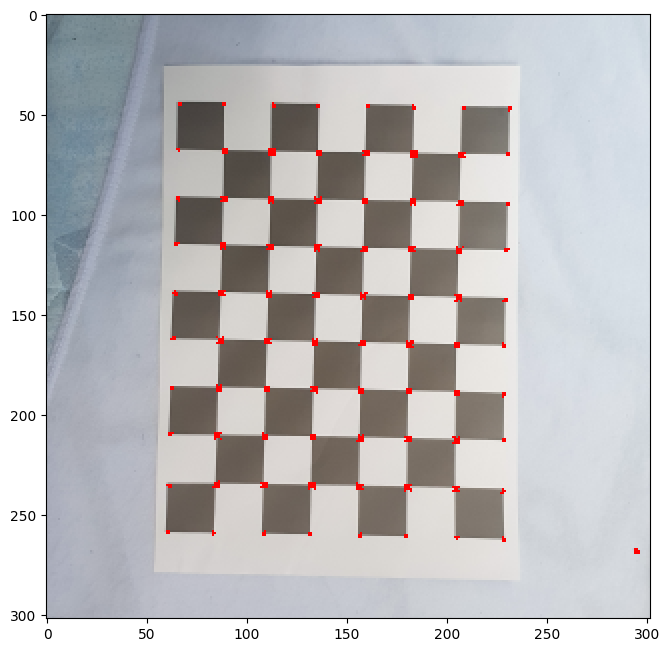

In [5]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

corners = src.copy()

corners[dst>0.01*dst.max()] = [255, 0, 0]

plt.imshow(corners)
plt.show()

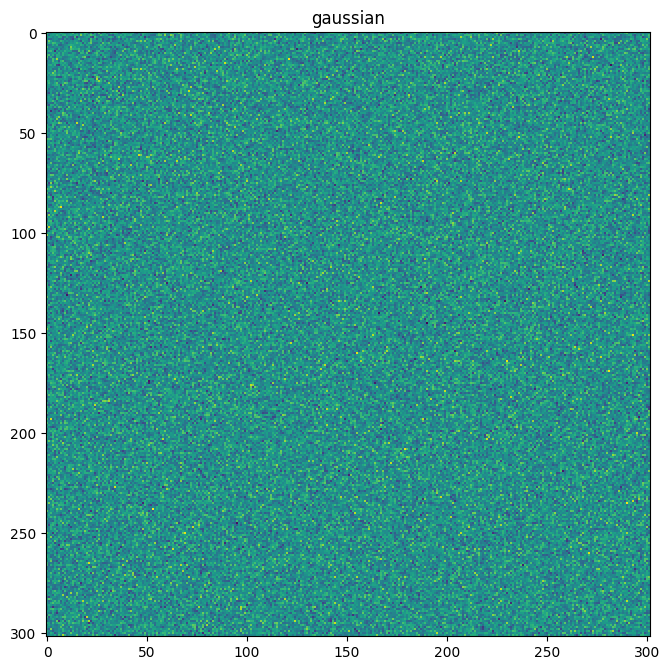

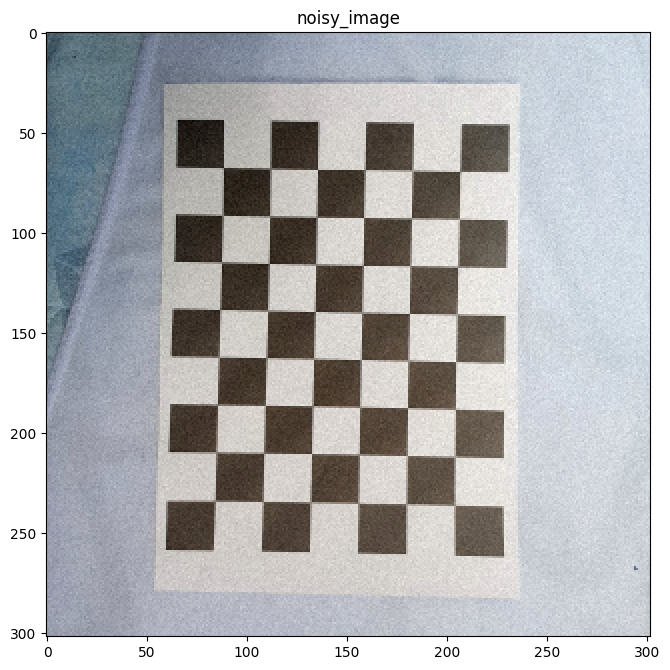

In [6]:
mean = 5
var = 20
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, (302,302)) #  np.zeros((224, 224), np.float32)

noisy_image = np.zeros(src.shape, np.float32)

if len(src.shape) == 2:
    noisy_image = src + gaussian
else:
    noisy_image[:, :, 0] = src[:, :, 0] + gaussian
    noisy_image[:, :, 1] = src[:, :, 1] + gaussian
    noisy_image[:, :, 2] = src[:, :, 2] + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

plt.imshow(gaussian)
plt.title('gaussian')
plt.show()

plt.imshow(noisy_image)
plt.title('noisy_image')
plt.show()

43 65
43 87
43 112
43 113
43 136
44 64
44 65
44 66
44 67
44 87
44 88
44 111
44 112
44 113
44 114
44 134
44 135
44 136
44 137
44 161
44 182
44 184
45 65
45 66
45 67
45 86
45 87
45 88
45 89
45 111
45 112
45 113
45 114
45 134
45 135
45 136
45 160
45 161
45 162
45 182
45 183
45 184
45 207
45 209
45 230
46 86
46 87
46 112
46 113
46 114
46 134
46 135
46 136
46 159
46 160
46 161
46 162
46 181
46 182
46 183
46 184
46 206
46 207
46 208
46 209
46 229
46 230
46 231
47 160
47 161
47 162
47 181
47 182
47 183
47 207
47 208
47 209
47 210
47 229
47 230
47 231
47 232
48 208
48 209
48 210
48 229
48 230
48 231
65 65
65 66
65 67
65 86
65 91
66 64
66 65
66 66
66 67
66 86
66 87
66 88
66 89
66 90
66 110
66 111
66 112
66 113
66 114
66 133
66 134
66 137
66 138
66 157
66 161
67 65
67 66
67 67
67 87
67 88
67 89
67 90
67 110
67 111
67 112
67 113
67 114
67 134
67 135
67 136
67 137
67 138
67 157
67 158
67 159
67 160
67 161
67 181
67 182
67 183
67 184
67 185
67 205
67 209
67 229
68 66
68 87
68 88
68 89
68 90
68 110


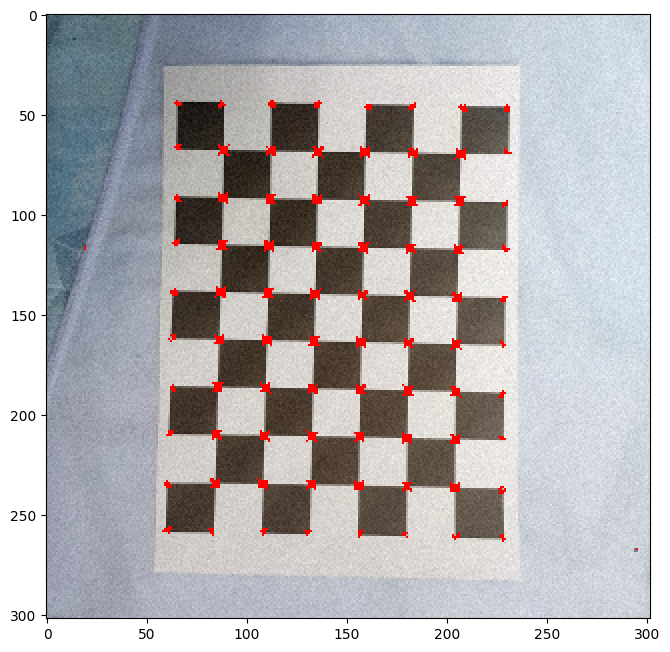

In [392]:
harris(noisy_image, 0.04)